In [0]:
%matplotlib inline

### Install the libraries

In [20]:
! pip install DPD
! pip install SubCMedians

In [22]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Load the libraries

In [0]:
from DPD.dpd import dpd_generator

In [0]:
from SubCMedians.subcmedians_v3 import subcmedians_v3

# Create a Dendrogram Prototypical Discourses generator

In [0]:
g = dpd_generator()

### Load the corpus

In [0]:
g.build_corpus("corpus_example")

In [27]:
g.corpus[53:55]

[['los',
  'partidarios',
  'de',
  'una',
  'teoría',
  'intermedia',
  'es',
  'á',
  'saber',
  'que',
  'la',
  'fué',
  'desde',
  'el',
  'principio',
  'un',
  'poema',
  'completo',
  'pero',
  'mucho',
  'menos',
  'extenso',
  'que',
  'el',
  'actual',
  'así',
  'opinan',
  'hermann',
  'bergk',
  'christ',
  'grote',
  'guigniaut',
  'koechly',
  'y',
  'croiset'],
 ['mr']]

In [0]:
STOP_WORDS_SPANISH = ['y','e','un','una','unos','unas','la','las','les',
                      'le','lo','los',u'el','a','al','de','del','en','se',
                      'este','esto','esta','estos','estas','aquel','aquello',
                      'aquella','aquellos','aquellas','ese','eso','esa','esos',
                      'esas']
g.filter_stop_words(stop_words = STOP_WORDS_SPANISH)


In [29]:
g.corpus[53:55]

[['partidarios',
  'teoría',
  'intermedia',
  'es',
  'á',
  'saber',
  'que',
  'fué',
  'desde',
  'principio',
  'poema',
  'completo',
  'pero',
  'mucho',
  'menos',
  'extenso',
  'que',
  'actual',
  'así',
  'opinan',
  'hermann',
  'bergk',
  'christ',
  'grote',
  'guigniaut',
  'koechly',
  'croiset'],
 ['mr']]

### Build vector space model

In [0]:
D = 300

In [0]:
W2V_STD_PARAMS = {"min_count":5,
                  "window":5,
                  "size":D,
                  "negative":5,
                  "iter":5}
g.build_vector_space_model(w2v_params = W2V_STD_PARAMS)

In [32]:
g.word_vectors

0         1         2    ...       297       298       299
project     -0.054364 -0.501773  0.266972  ...  0.182380  0.405225 -0.039811
gutenberg   -0.054484 -0.492398  0.251528  ...  0.178520  0.418466 -0.051893
ebook       -0.060117 -0.537588  0.282342  ...  0.202552  0.447020 -0.055967
of          -0.063055 -0.543823  0.285263  ...  0.202021  0.440977 -0.054591
ilíada      -0.054526 -0.498702  0.251191  ...  0.184063  0.426814 -0.061760
...               ...       ...       ...  ...       ...       ...       ...
medium      -0.008660 -0.062923  0.030811  ...  0.024205  0.054618 -0.005486
replacement -0.003593 -0.033920  0.017924  ...  0.013809  0.028025 -0.003597
volunteers  -0.002998 -0.023766  0.010810  ...  0.009883  0.022096 -0.002437
limited     -0.005235 -0.038911  0.018200  ...  0.016575  0.032675 -0.003688
received    -0.005270 -0.042788  0.021856  ...  0.018967  0.036522 -0.002424

[3521 rows x 300 columns]

### Cluster words

In [33]:
subcmedians_params = {"D":D,
                      "Gmax":D*10,
                      "H":200,
                      "nb_iter":10000}
g.build_clusters(clutering_constructor=subcmedians_v3,
                 clustering_params=subcmedians_params)
print(g.clustering)


project        0
gutenberg      0
ebook          0
of             0
ilíada         0
              ..
medium         2
replacement    5
volunteers     5
limited        2
received       2
Length: 3521, dtype: int64
project        0
gutenberg      0
ebook          0
of             0
ilíada         0
              ..
medium         2
replacement    5
volunteers     5
limited        2
received       2
Length: 3521, dtype: int64


### Generate dendrograms

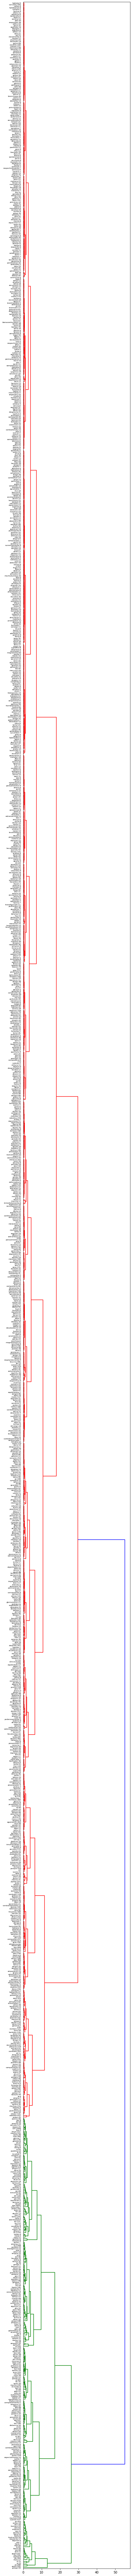

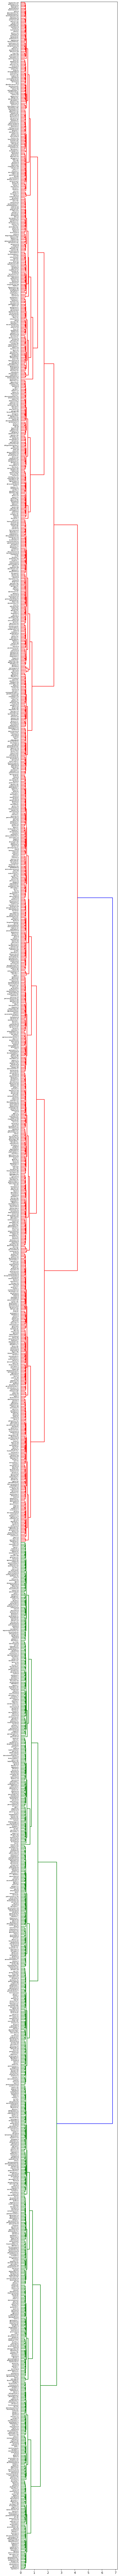

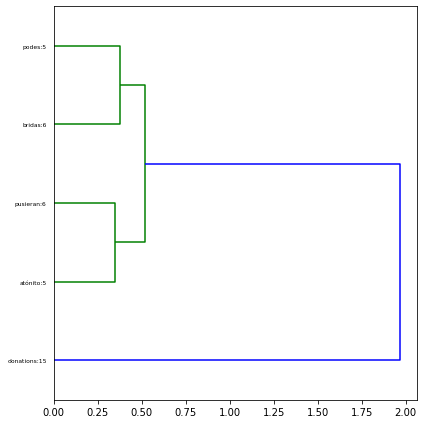

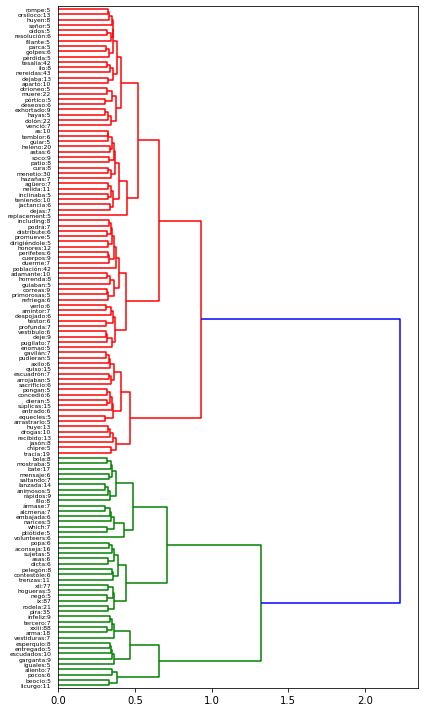

In [34]:
g.build_dendrograms("dendrograms/")